# Read an audio and video file

In [1]:
import matplotlib.pyplot as plt
from cutcutcodec.core.io import read
from cutcutcodec.utils import get_project_root

In [2]:
file = get_project_root().parent / "media" / "intro.webm"  # your media path
container = read(file)  # open the file
stream_a = container.out_select("audio")[0]  # first audio stream
stream_v = container.out_select("video")[0]  # first video stream

In [3]:
# general properties
print(f"container of the file {container.filename}")
print(f"{stream_a.layout.name} audio of {float(stream_a.duration):.1f} s at {stream_a.rate} Hz")
print(f"{stream_v.width}x{stream_v.height} video of {float(stream_v.duration):.1f} s at {stream_v.rate} fps")

container of the file /data/Documents/cutcutcodec/media/intro.webm
stereo audio of 9.9 s at 22050 Hz
1280x720 video of 9.8 s at 30000/1001 fps


## Read Audio

In [4]:
frame_a = stream_a.snapshot(2.0, stream_a.rate, 512)  # time, sample rate, nbr samples

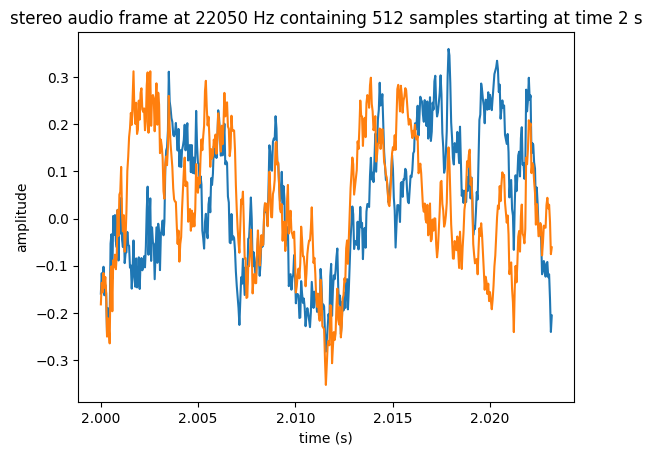

In [5]:
plt.plot(frame_a.timestamps, frame_a.T)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.title(
    f"{frame_a.layout.name} audio frame at {frame_a.rate} Hz "
    f"containing {frame_a.samples} samples starting at time {frame_a.time} s"
)
plt.show()

## Read Video

In [6]:
frame_v = stream_v.snapshot(2.0, (stream_v.height, stream_v.width))

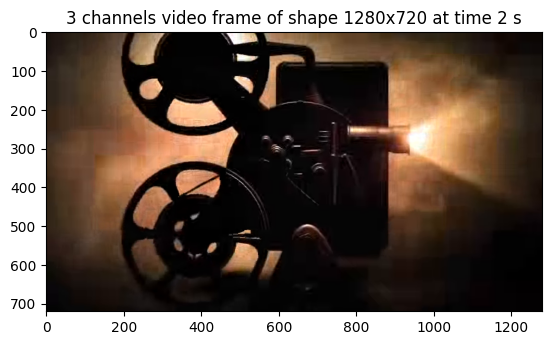

In [7]:
plt.imshow(frame_v.to_numpy_bgr()[..., ::-1])  # bgr to rgb
plt.title(f"{frame_v.channels} channels video frame of shape {frame_v.width}x{frame_v.height} at time {frame_v.time} s")
plt.show()